# 第三次作业

对40头水牛体重 $y(kg)$ 、胸围 $x_1(cm)$ 、体长 $x_2(cm)$ 和体高 $x_3(cm)$ 进行测定，实验数据见[附表](https://gitee.com/mosah/aedsa/blob/master/assignment_3/data.csv)。试建立 $y$ 对 $x_1$、$x_2$、$x_3$的三元线性回归方程：<br>
$$\widehat{y} = b_0 + b_1 x_1 + b_2 x_2 + b_3 x_3  $$

本文由vscode jupyter插件导出，源文件为ipynb格式。<br>
源文件链接：<br>
[Gitee Mosah_AEDSA assignment_3](https://gitee.com/mosah/aedsa/blob/master/assignment_3/dp.ipynb) <br>
[表格数据](https://gitee.com/mosah/aedsa/blob/master/assignment_3/data.csv)


## 引入需要的库

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

from statsmodels.formula.api import ols
# from statsmodels.stats.anova import anova_lm
from pandas import DataFrame,Series
from sklearn.linear_model import LinearRegression #线性回归
from sklearn.model_selection import train_test_split # 切分数据
from sklearn.metrics import mean_squared_error #评价指标

warnings.filterwarnings("ignore")

plt.rc("font",family='KaiTi')       #指定中文字体，不然会乱码
#%matplotlib inline是Jupyter Notebook的魔术命令，用于在 Notebook 中以行内方式显示 matplotlib 绘图
%config InlineBackend.figure_format = 'retina'      #绘制高清图像
%matplotlib inline


## 数据的导入与整理

In [2]:
# 引入数据
data = pd.read_csv('data.csv', header=1)  # 导入数据，并指定标题所在的行号为第1行

print(data.head())

# 调整表格删除多余列
# data = data.drop(columns=['编号'])
data = data.drop(columns=data.filter(like='Unnamed:').columns)
data.head()


   编号   胸围x1   体长x2   体高x3    体重y  Unnamed: 5  Unnamed: 6  Unnamed: 7  \
0   1  194.0  146.0  122.1  443.5         NaN         NaN         NaN   
1   2  200.0  150.0  123.5  507.5         NaN         NaN         NaN   
2   3  194.0  150.0  126.5  462.5         NaN         NaN         NaN   
3   4  211.0  153.0  134.5  514.0         NaN         NaN         NaN   
4   5  205.0  153.0  129.5  471.5         NaN         NaN         NaN   

   Unnamed: 8  Unnamed: 9  
0         NaN         NaN  
1         NaN         NaN  
2         NaN         NaN  
3         NaN         NaN  
4         NaN         NaN  


,编号,胸围x1,体长x2,体高x3,体重y
0,1,194.0,146.0,122.1,443.5
1,2,200.0,150.0,123.5,507.5
2,3,194.0,150.0,126.5,462.5
3,4,211.0,153.0,134.5,514.0
4,5,205.0,153.0,129.5,471.5


## 数据概览

              编号       胸围x1        体长x2        体高x3      体重y
count  40.000000   40.00000   40.000000   40.000000   40.000
mean   20.500000  197.35000  147.312500  125.215000  488.600
std    11.690452    9.01082    8.210912    5.964749   60.882
min     1.000000  179.00000  130.000000  114.000000  404.000
25%    10.750000  191.50000  140.000000  120.875000  448.375
50%    20.500000  196.25000  149.500000  124.000000  478.750
75%    30.250000  203.00000  153.000000  128.775000  514.250
max    40.000000  220.00000  165.000000  142.200000  702.000
编号      0
胸围x1    0
体长x2    0
体高x3    0
体重y     0
dtype: int64


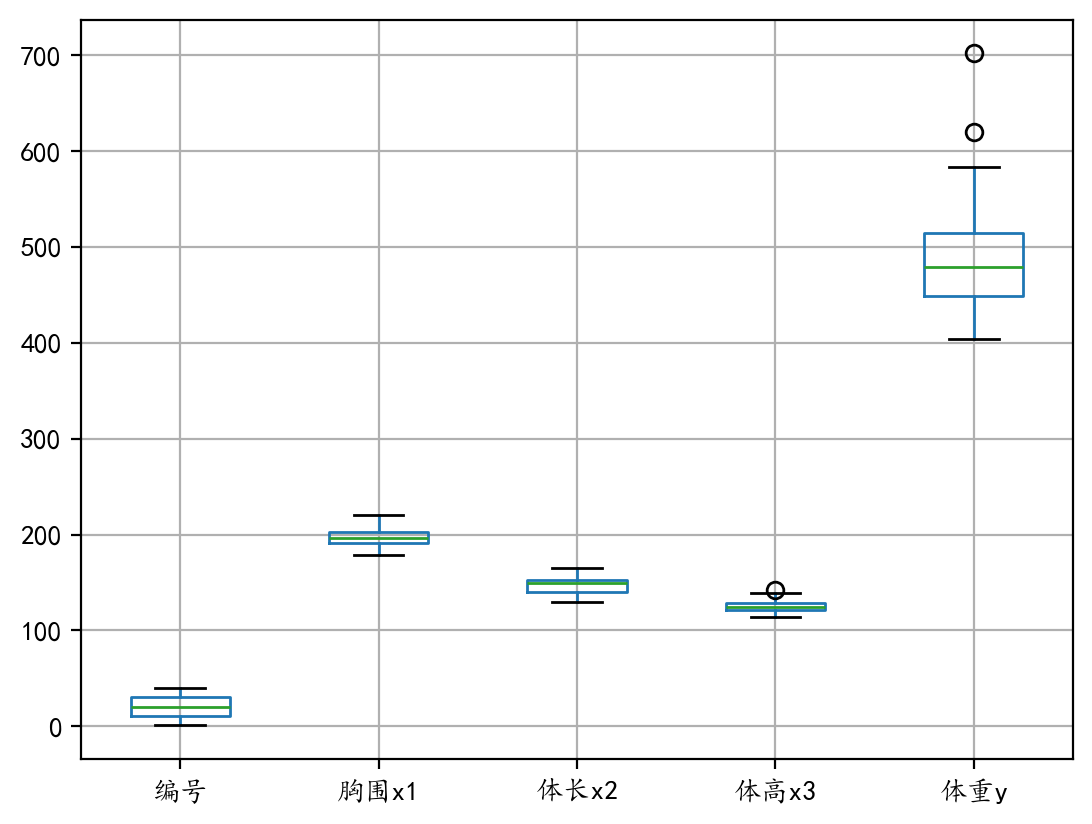

In [3]:
# 数据描述
print(data.describe())

# 缺失值检验
print(data[data.isnull()==True].count())

data.boxplot()
plt.show()


### 可视化线性回归

查看特征变量‘胸围’、‘体长’和‘体高’与'体重'变量的线性回归关系

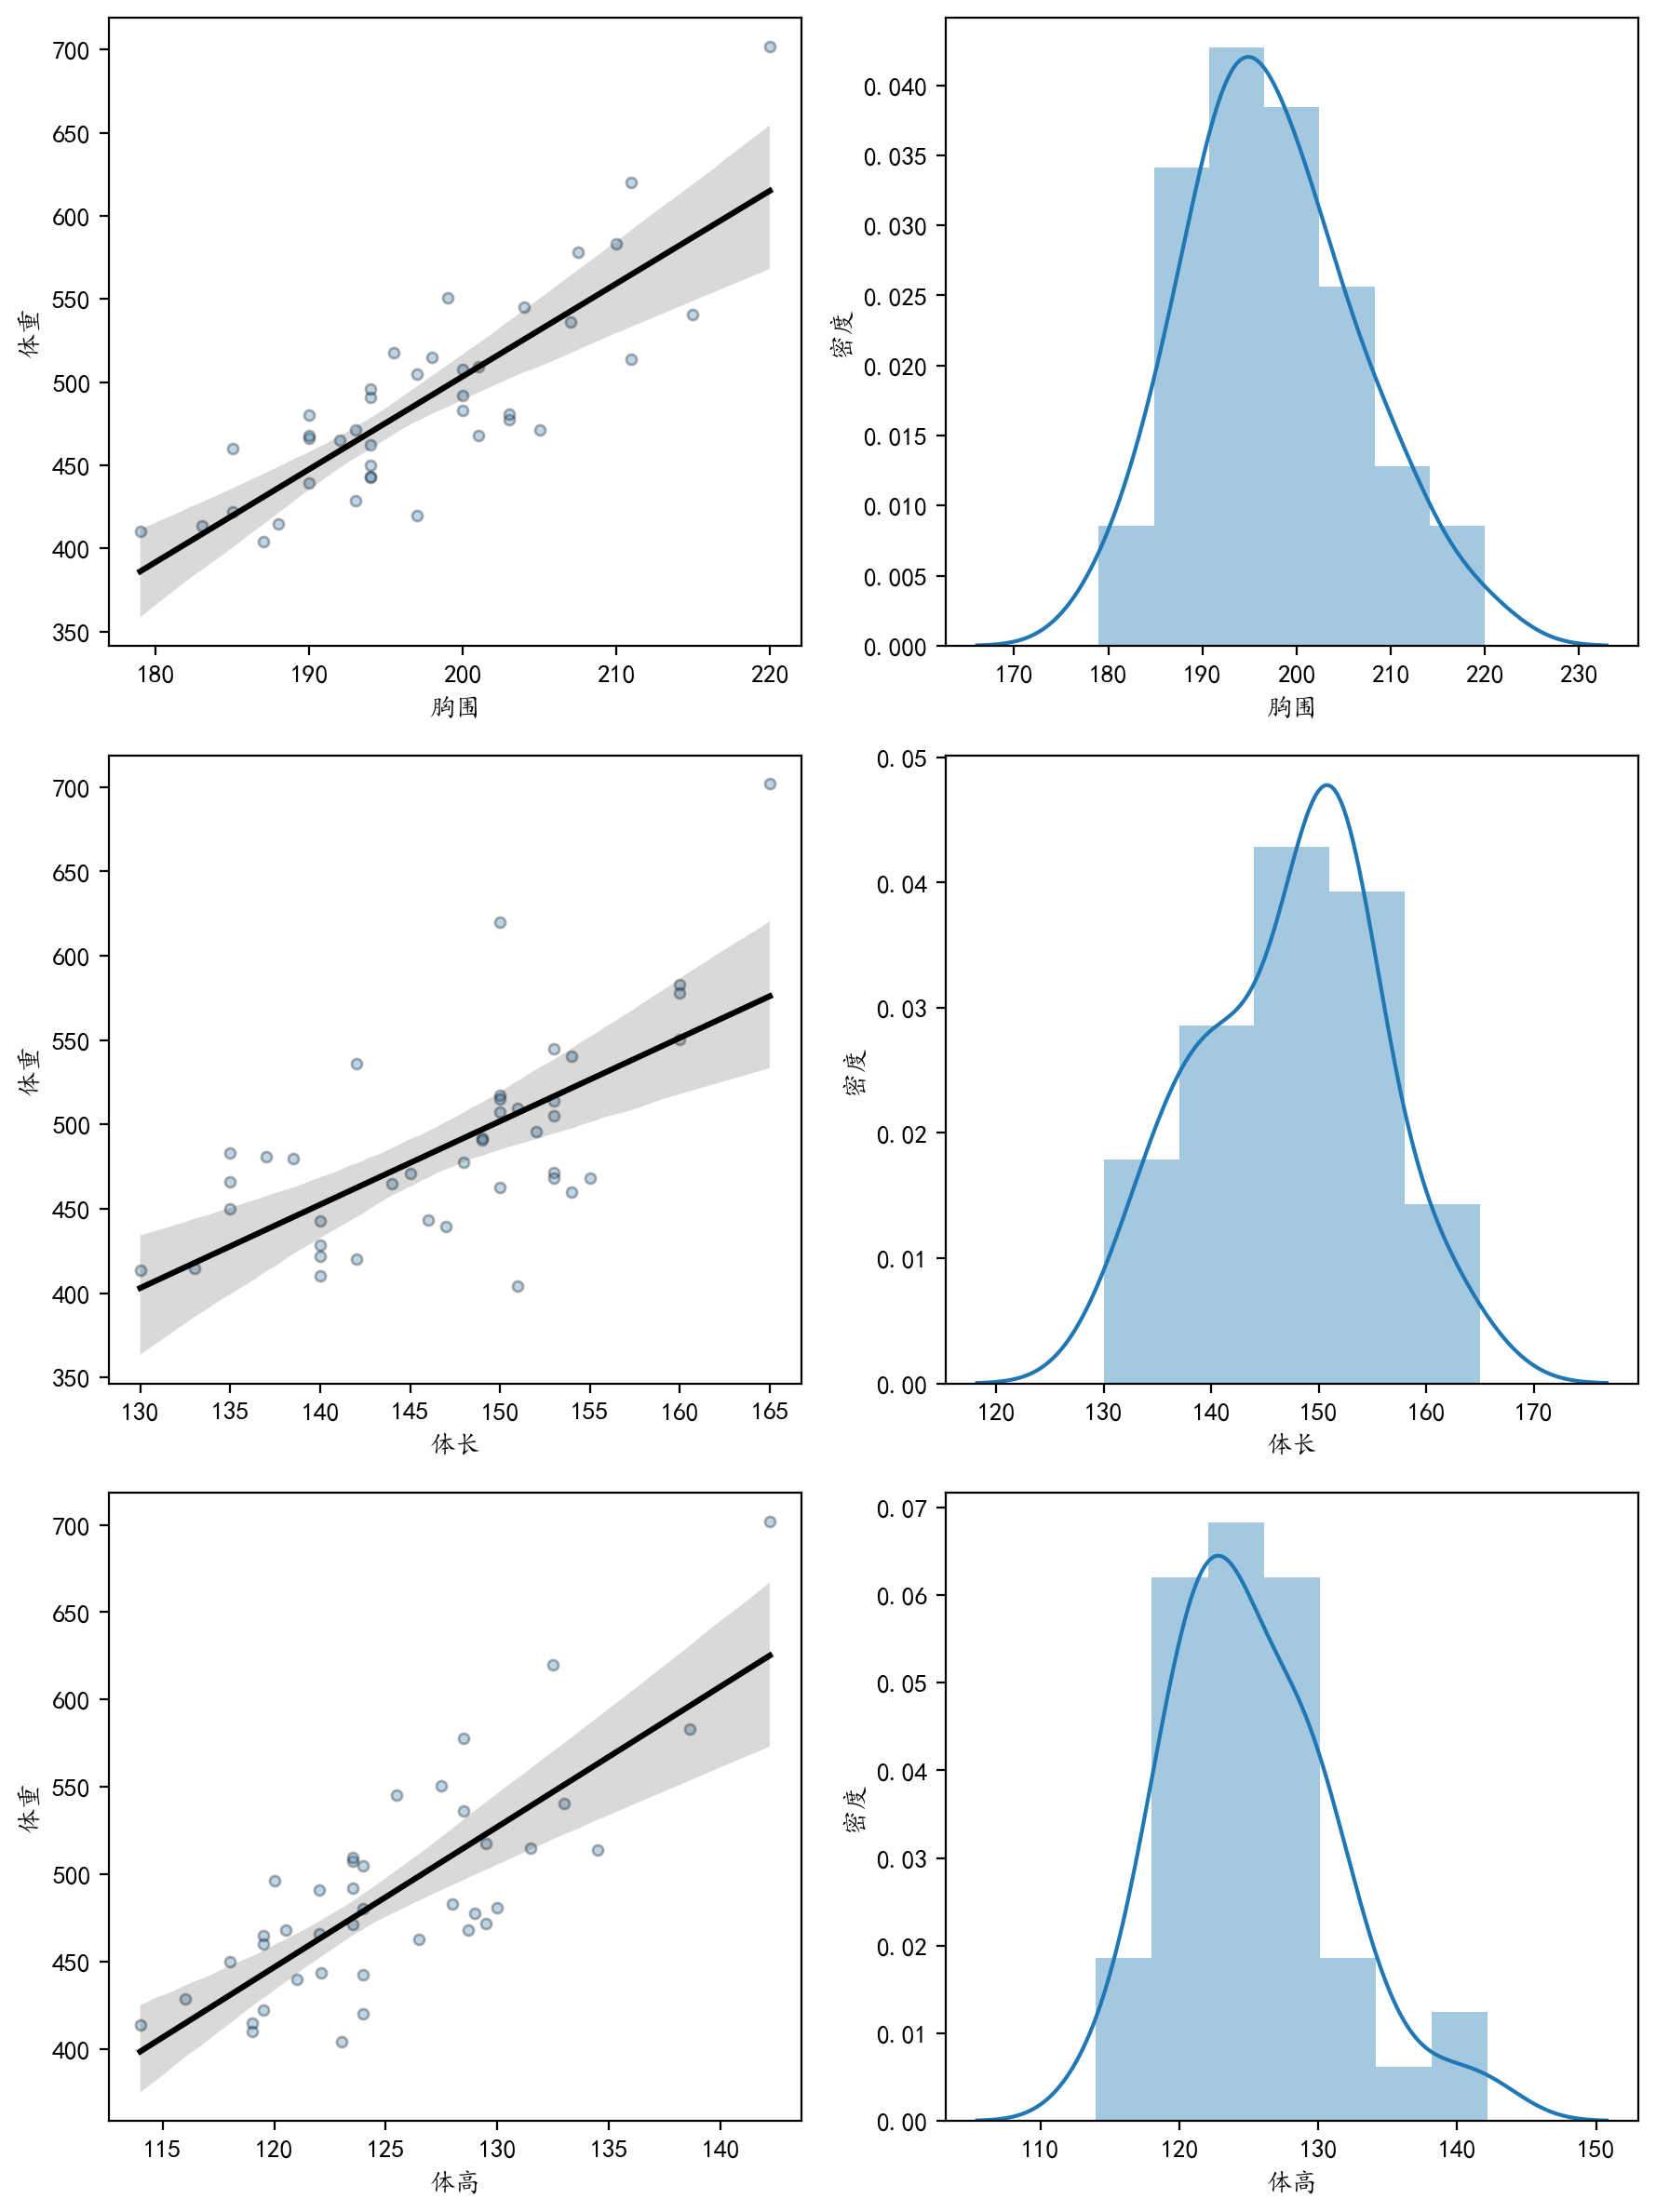

In [21]:
# 设置子图数量和排列方式
fcols = 2
frows = 3

# 创建画布
fig, axes = plt.subplots(frows, fcols, figsize=(9, 12))

# 胸围与体重
sns.regplot(x='胸围x1', y='体重y', data=data, ax=axes[0, 0],
            scatter_kws={'marker': '.', 's': 16, 'alpha': 0.3, 'edgecolor': 'black'},
            line_kws={'color': 'k'})
sns.distplot(data['胸围x1'].dropna(), ax=axes[0, 1])
axes[0, 0].set_xlabel('胸围')
axes[0, 0].set_ylabel('体重')
axes[0, 1].set_xlabel('胸围')
axes[0, 1].set_ylabel('密度')

# 体长与体重
sns.regplot(x='体长x2', y='体重y', data=data, ax=axes[1, 0],
            scatter_kws={'marker': '.', 's': 16, 'alpha': 0.3, 'edgecolor': 'black'},
            line_kws={'color': 'k'})
sns.distplot(data['体长x2'].dropna(), ax=axes[1, 1])
axes[1, 0].set_xlabel('体长')
axes[1, 0].set_ylabel('体重')
axes[1, 1].set_xlabel('体长')
axes[1, 1].set_ylabel('密度')

# 体高与体重
sns.regplot(x='体高x3', y='体重y', data=data, ax=axes[2, 0],
            scatter_kws={'marker': '.', 's': 16, 'alpha': 0.3, 'edgecolor': 'black'},
            line_kws={'color': 'k'})
sns.distplot(data['体高x3'].dropna(), ax=axes[2, 1])
axes[2, 0].set_xlabel('体高')
axes[2, 0].set_ylabel('体重')
axes[2, 1].set_xlabel('体高')
axes[2, 1].set_ylabel('密度')

# 调整子图间距和布局
fig.tight_layout()

# 显示图形
plt.show()


上如图种所示，可以了解到不同的因素对销量的预测线（置信度= 95 %），也可以大致看出不同特征对于标签值的影响与相关关系在了解了数据的各种情况。

### 热力图

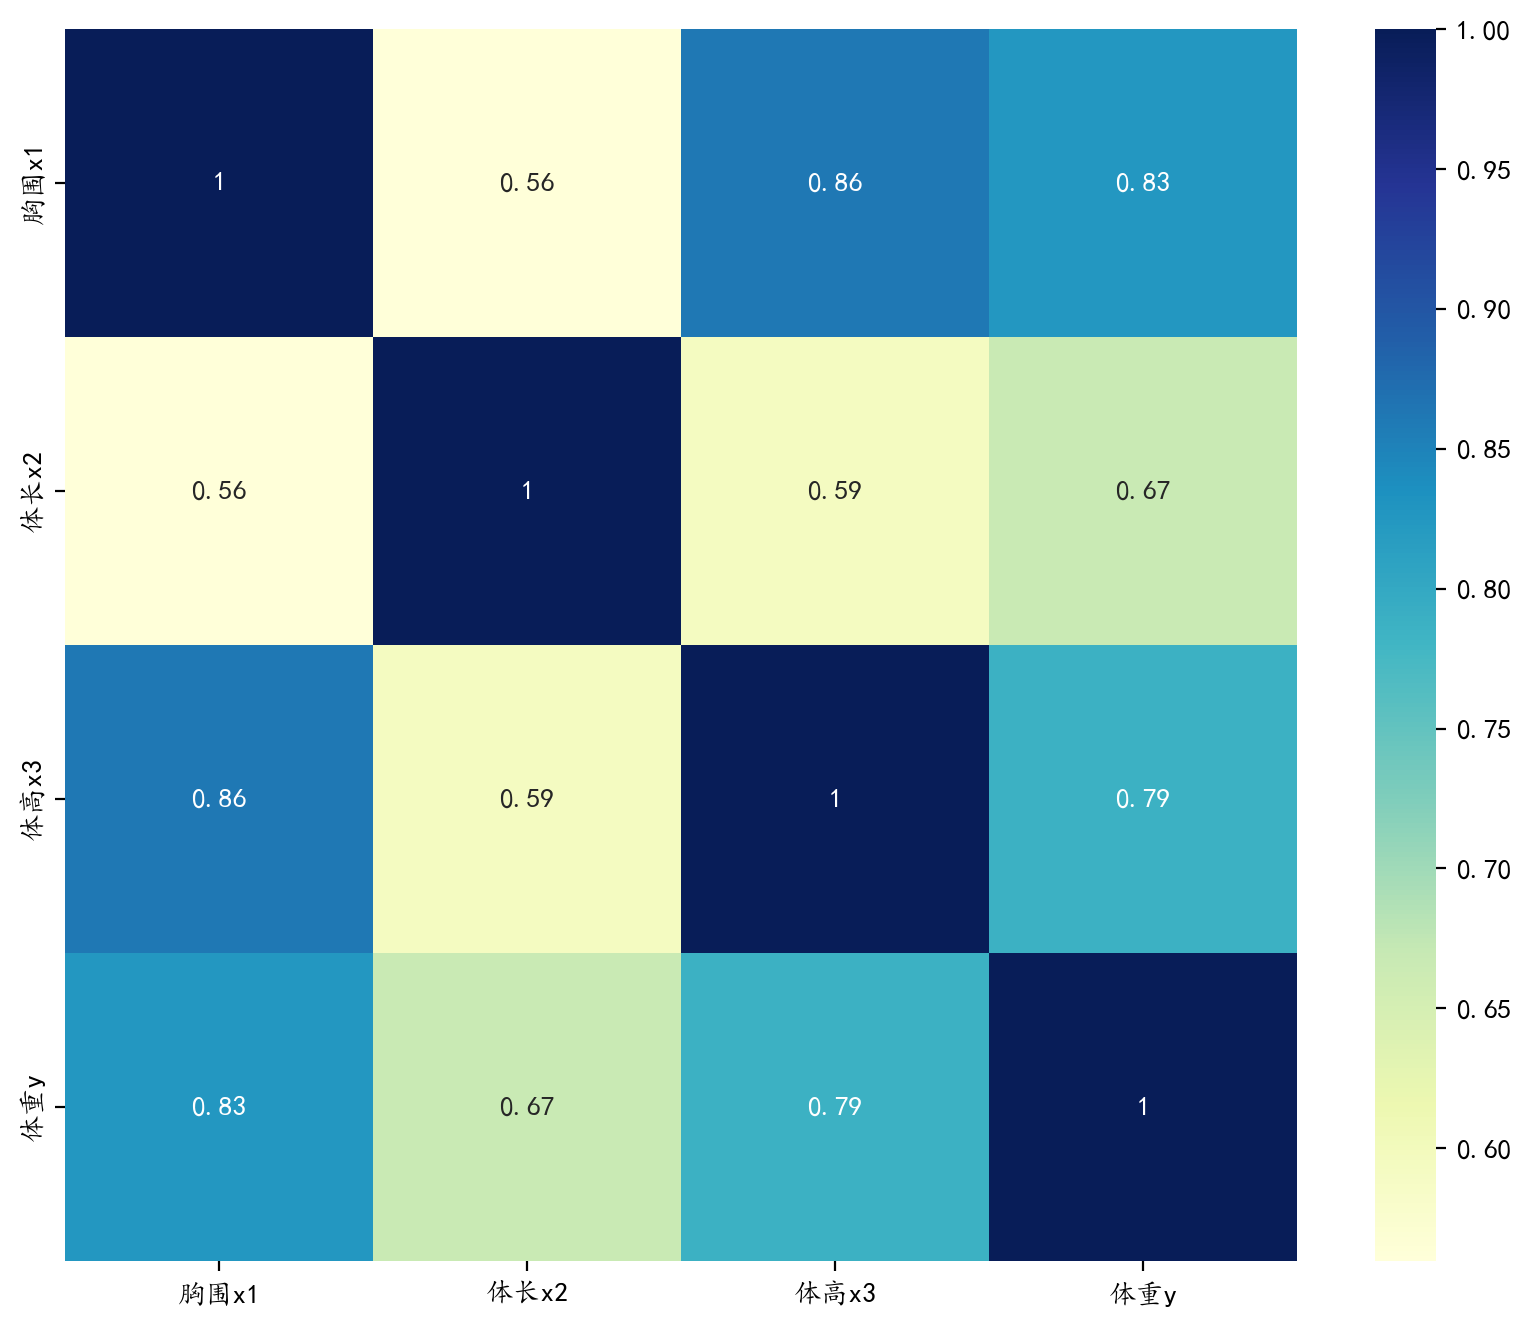

In [5]:
df = data.drop(columns=['编号'])

fig, ax = plt.subplots(figsize=(10, 8))#调整画布大小

ax = sns.heatmap(df.corr(), square=True, annot=True, cmap='YlGnBu')#画热力图   annot=True 显示系数

plt.show()


## 模型建立

### 直接采用原始数据训练所得的模型

In [6]:
y = data["体重y"]
X = sm.add_constant(data[["胸围x1", "体长x2", "体高x3"]])

# 使用了Statsmodels库来进行普通最小二乘回归（OLS）构建线性回归模型
model = sm.OLS(y,X)

# 使用model.fit()函数对模型进行拟合
results = model.fit()

# 输出模型详细数据
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    体重y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     36.19
Date:                Thu, 19 Oct 2023   Prob (F-statistic):           5.79e-11
Time:                        16:34:49   Log-Likelihood:                -192.80
No. Observations:                  40   AIC:                             393.6
Df Residuals:                      36   BIC:                             400.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -728.9892    116.974     -6.232      0.000    -966.223    -491.755
胸围x1           3.5252      1.117      3.155      0.003       1.259       5.792
体长x2           1.9945      0.771      2.587      0.014       0.431       3.558
体高x3           1.8215      1.737      1.049      0.301      -1.701       5.344
==============================================================================
Omnibus:                        0.410   Durbin-Watson:                   2.256
Prob(Omnibus):                  0.814   Jarque-Bera (JB):                0.250
Skew:                          -0.189   Prob(JB):                        0.882
Kurtosis:                       2.914   Cond. No.                     6.47e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

可以得出以下结论：

- 模型的 $R$ 方值为 $0.751$ ，这意味着模型对数据的解释能力较强，即体重的变动中有 $75.1\%$ 可以由胸围、体长和体高的变动来解释.

- 调整后的 $R$ 方值为 $0.730$ ，考虑到模型复杂度的调整，该值反映了自变量对因变量的解释力。

- 在统计意义上，模型整体的 $F$ 统计量为 $36.19$ ，且对应的 $p-value$ 非常小 $（5.79e-11）$ ，表明模型的回归关系是显著的。

- 每个自变量的系数、标准误差、 $t$ 统计量和对应的p-value都列在下表中。其中，常数项的系数为 $-728.9892$ ， $胸围x_1$ 的系数为 $3.5252$ ， $体长x_2$的系数为 $1.9945$， $体高x_3$ 的系数为 $1.8215$ 。

- 根据每个自变量的 $p-value$ ，我们可以判断三个自变量是否统计显著。 $胸围x_1$ 和 $体长x_2$ 的 $p-value$ 小于 $0.05$ ，说明它们对 $体重y$ 的影响是显著的；而 $体高x_3$ 的 $p-value$ 为 $0.301$ ，大于 $0.05$ ，说明在统计意义上该变量与 $体重y$ 之间可能没有显著关系。

- 模型的残差分析方面， $Omnibus$ 和 $Jarque-Bera$ 统计量用于检验误差项的正态性。在这个模型中，它们的 $p-value$ 都较大（分别为 $0.814$ 和 $0.882$ ），表明误差项可能近似服从正态分布。

- $Durbin-Watson$ 统计量用于检验误差项之间是否存在自相关。在这个模型中， $Durbin-Watson$ 统计量为 $2.256$ ，接近于 $2$ ，说明误差项之间可能没有显著自相关。

- 最后，模型的条件数 $Cond. No.$ 为 $6.47 \times 10 ^3$ ，表示自变量矩阵的条件数。较大的条件数可能导致模型的数值不稳定性。

在这个结果中，我们主要看 `​​“coef”`​​、​​`“t”` ​​和 ​`​“P>|t|”​` ​这三列。​`​coef​`​就是回归系数，​`​const​`是回归常数，所以我们得到的这个回归模型就是：
​$$​y_1 = -728.9892 + 3.5252 x_1 + 1.9945 x_2 + 1.8215 x_3$$

In [7]:
# 使用了Scikit-learn库中的LinearRegression类进行简单的线性回归

# 需要将自变量和因变量分开，并将它们转换为numpy数组
# df = data
X = df.iloc[:,0:3].values
y = df.iloc[:,3].values

# 建立回归模型并进行拟合。使用LinearRegression方法建立回归模型，然后通过fit方法对数据进行拟合。
y1_model = LinearRegression()
y1_model.fit(X, y)

# 输出回归系数。回归系数存储在regressor对象中的coef_属性中，常数项存储在intercept_属性中。
# 存储参数 建立线性方程
b1_0 = round(y1_model.intercept_, 4)
b1 = np.round(y1_model.coef_, 4)

print("最佳拟合线:截距",b1_0,",回归系数：",b1)



最佳拟合线:截距 -728.9892 ,回归系数： [3.5252 1.9945 1.8215]


​$$​y_1 = -728.9892 + 3.5252 x_1 + 1.9945 x_2 + 1.8215 x_3$$

虽然使用了不同的库和方法，但以上两个代码片段实现的功能是相同的：拟合一个线性回归模型。

- `model = sm.OLS(y, X)`使用了Statsmodels库来进行普通最小二乘回归（OLS）。Statsmodels提供了一些额外的统计分析功能，并且在回归结果的摘要中提供了更详细的统计信息。

- `regressor = LinearRegression()`使用了Scikit-learn库中的LinearRegression类。Scikit-learn是一个广泛使用的机器学习库，提供了许多机器学习算法和工具。

这两种方法各有优劣，具体取决于对数据统计分析的需求和偏好。

如果只需要进行简单的线性回归，并且对统计分析没有特别的要求，那使用Scikit-learn的`LinearRegression`类是一个简洁且方便的选择。其提供了简单易用的接口，并且可以轻松地进行预测和评估模型的性能；若对回归结果的统计分析感兴趣，例如p值、置信区间等信息，那么使用Statsmodels的OLS函数会更合适。Statsmodels提供了丰富的统计功能，可以帮助我们深入了解回归结果的统计学意义。

### 异常值分析

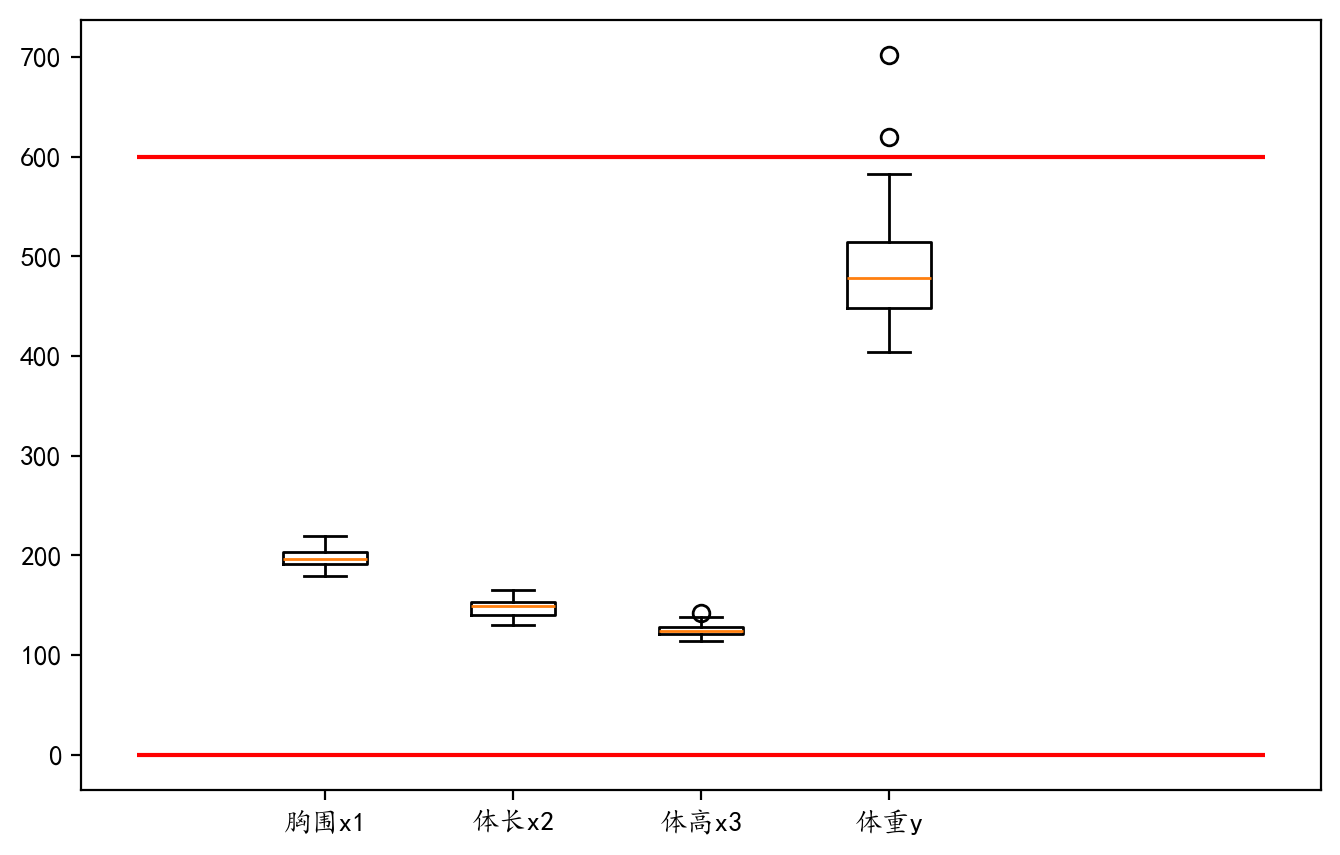

In [8]:
plt.figure(figsize=(8, 5))
plt.boxplot(x=df.values,labels=df.columns)
plt.hlines([0, 600], 0, 6, colors='r')
plt.show()


### 遗弃“异常”值再构建线性回归方程

In [9]:
# 保留'体重y'列的值小于600的行，删除其他行。
data_drop_outliner = df[df['体重y'] < 600]

# 重置索引，并丢弃旧的索引
# data_drop_outliner = data_drop_outliner.reset_index(drop=True)

data_drop_outliner.describe()
# data_drop_outliner


,胸围x1,体长x2,体高x3,体重y
count,38.000000,38.000000,38.000000,38.000000
mean,196.394737,146.776316,124.576316,479.526316
std,8.108352,7.881468,5.277409,46.097421
min,179.000000,130.000000,114.000000,404.000000
25%,190.500000,140.000000,120.625000,445.125000
50%,194.750000,149.000000,123.750000,474.500000
75%,201.000000,153.000000,128.500000,509.000000
max,215.000000,160.000000,138.600000,583.000000


In [10]:
y = data_drop_outliner["体重y"]
X = sm.add_constant(data_drop_outliner[["胸围x1", "体长x2", "体高x3"]])
y2_model = sm.OLS(y,X)
results = y2_model.fit()
# results.summary()
results.params = np.round(results.params, 4)
print(results.params)


const   -506.5932
胸围x1       3.0377
体长x2       1.9677
体高x3       0.8085
dtype: float64


依据上述数据可以构建新的回归模型：
​$$​y_2 = -506.5932 + 3.0377 x_1 + 1.9677 x_2 + 0.8085 x_3$$

### 以数据中的前32组数据作为训练集建立线性回归模型，以后8组的数据作为测试集检验模型的拟合程度

In [11]:
# 截取表格作为训练集与数据集
train_set = data.head(32)
test_set = data.tail(8)


#### 异常值排除

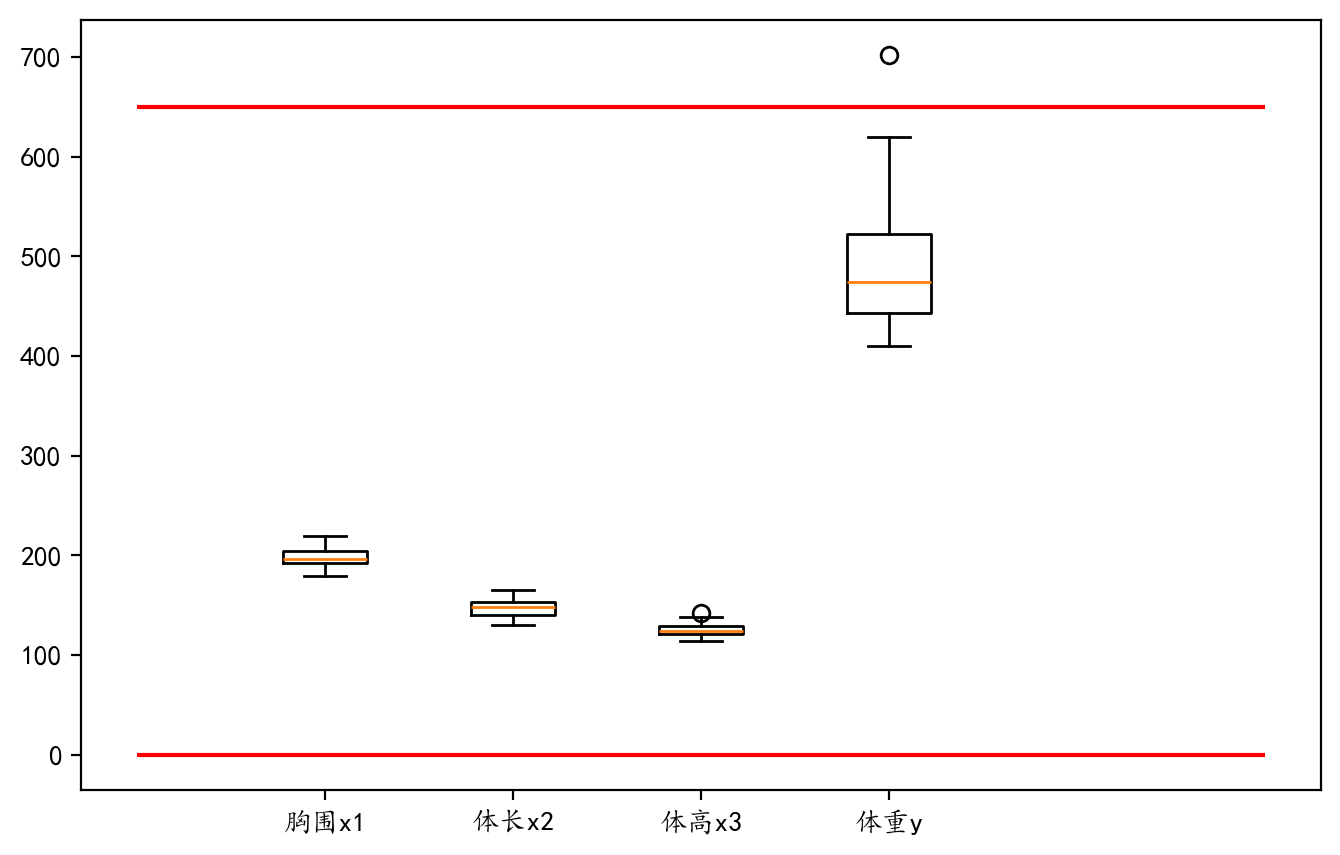

In [12]:
tsdo = train_set.drop(columns=['编号']) # train_set_drop_outliner

plt.figure(figsize=(8, 5))
plt.boxplot(x=tsdo.values,labels=tsdo.columns)
plt.hlines([0, 650], 0, 6, colors='r')
plt.show()


In [13]:
# 删除数值明显偏大的异常值
tsdo = tsdo[tsdo['体重y'] < 650] #保留'体重y'列的值小于650的行，删除其他行。


#### 模型建立

In [14]:
# 将自变量和因变量分离，并将它们转换为numpy数组
X = tsdo.iloc[:,0:3].values
y = tsdo.iloc[:,3].values

# 建立回归模型并进行拟合。使用LinearRegression方法建立回归模型，然后通过fit方法对数据进行拟合。
y3_model = LinearRegression()
y3_model.fit(X, y)

# 存储参数 建立线性方程
b3_0 = round(y3_model.intercept_, 4)
b3 = np.round(y3_model.coef_, 4)

print("最佳拟合线:截距",b3_0,",回归系数：",b3)


最佳拟合线:截距 -570.9762 ,回归系数： [2.9672 1.8729 1.5596]


建立得到模型$y_3$：​
$$​y_3 = -570.9762 + 2.9672 x_1 + 1.8729 x_2 + 1.5596 x_3$$

### 随机选取32组数据为训练集建立的模型

In [15]:
data_random = data.drop(columns=['编号'])
X_train,X_test,Y_train,Y_test = train_test_split(data_random.iloc[:,:3],data_random['体重y'],train_size=.80)

y4_model = LinearRegression()
y4_model.fit(X_train,Y_train)

b4_0  = round(y4_model.intercept_, 4)
b4 = np.round(y4_model.coef_, 4)

print("最佳拟合线:截距",b4_0,",回归系数：",b4)


最佳拟合线:截距 -749.82 ,回归系数： [3.72   1.8577 1.8402]


​$$​y_4 = -749.82 + 3.72 x_1 + 1.8577 x_2 + 1.8402 x_3$$

## 检验（模型测试）

### 检验回归模型$y_1$对于测试集的拟合程度

In [16]:
# 将测试集的自变量代入回归方程，计算预测值
df['y_predicted'] = b1_0 + b1[0] * test_set['胸围x1'] + b1[1] * test_set['体长x2'] + b1[2] * test_set['体高x3']

# 比较预测值和实际值
df[['体重y', 'y_predicted']]

# 计算均方误差（MSE）
mse = ((df['体重y'] - df['y_predicted']) ** 2).mean()

# 计算决定系数（R-squared）
ss_total = ((df['体重y'] - df['体重y'].mean()) ** 2).sum()
ss_residual = ((df['体重y'] - df['y_predicted']) ** 2).sum()
r_squared = 1 - (ss_residual / ss_total)

print("\n均方误差（MSE）：", mse)
print("决定系数（R-squared）：", r_squared)



均方误差（MSE）： 434.47052658375014
决定系数（R-squared）： 0.9759559359685137


### 检验回归模型$y_2$对于测试集的拟合程度

In [17]:
# 将测试集的自变量代入回归方程，计算预测值
df['y_predicted'] = results.params['const'] + results.params['胸围x1'] * test_set['胸围x1'] + \
                    results.params['体长x2'] * test_set['体长x2'] + results.params['体高x3'] * test_set['体高x3']

# 比较预测值和实际值
df[['体重y', 'y_predicted']]

# 计算均方误差（MSE）
mse = ((df['体重y'] - df['y_predicted']) ** 2).mean()

# 计算决定系数（R-squared）
ss_total = ((df['体重y'] - df['体重y'].mean()) ** 2).sum()
ss_residual = ((df['体重y'] - df['y_predicted']) ** 2).sum()
r_squared = 1 - (ss_residual / ss_total)

print("\n均方误差（MSE）：", mse)
print("决定系数（R-squared）：", r_squared)



均方误差（MSE）： 504.6566148562498
决定系数（R-squared）： 0.9720717627109792


### 检验回归模型$y_3$对于测试集的拟合程度

In [18]:
# 将测试集的自变量代入回归方程，计算预测值
test_set['y_predicted'] = b3_0 + b3[0] * test_set['胸围x1'] + b3[1] * test_set['体长x2'] + b3[2] * test_set['体高x3']

print(test_set[['体重y', 'y_predicted']])

# 比较预测值和实际值
test_set[['体重y', 'y_predicted']]

# 计算均方误差（MSE）
mse = ((test_set['体重y'] - test_set['y_predicted']) ** 2).mean()

# 计算决定系数（R-squared）
# r_squarede = y3_regressor.score(test_set[["胸围x1", "体长x2", "体高x3"]],test_set['体重y'])
ss_total = ((test_set['体重y'] - test_set['体重y'].mean()) ** 2).sum()
ss_residual = ((test_set['体重y'] - test_set['y_predicted']) ** 2).sum()
r_squared = 1 - (ss_residual / ss_total)

print("\n均方误差（MSE）：", mse)
print("决定系数（R-squared）：", r_squared)



      体重y  y_predicted
32  515.0     502.5518
33  483.0     474.9341
34  505.0     493.5063
35  465.0     454.7960
36  460.0     452.7546
37  404.0     458.5289
38  496.0     476.4934
39  509.5     500.8495

均方误差（MSE）： 492.1848164899998
决定系数（R-squared）： 0.5804707642417968


均方误差（MSE）是评估模型在预测过程中误差的平方的平均值。该值越小，表示模型的拟合程度越好。

决定系数（R-squared）用于衡量模型对数据变异性的解释程度，其取值范围在0到1之间。当决定系数接近1时，表示模型能够很好地解释因变量的变异性；而当决定系数接近0时，则表示模型的解释能力较差。

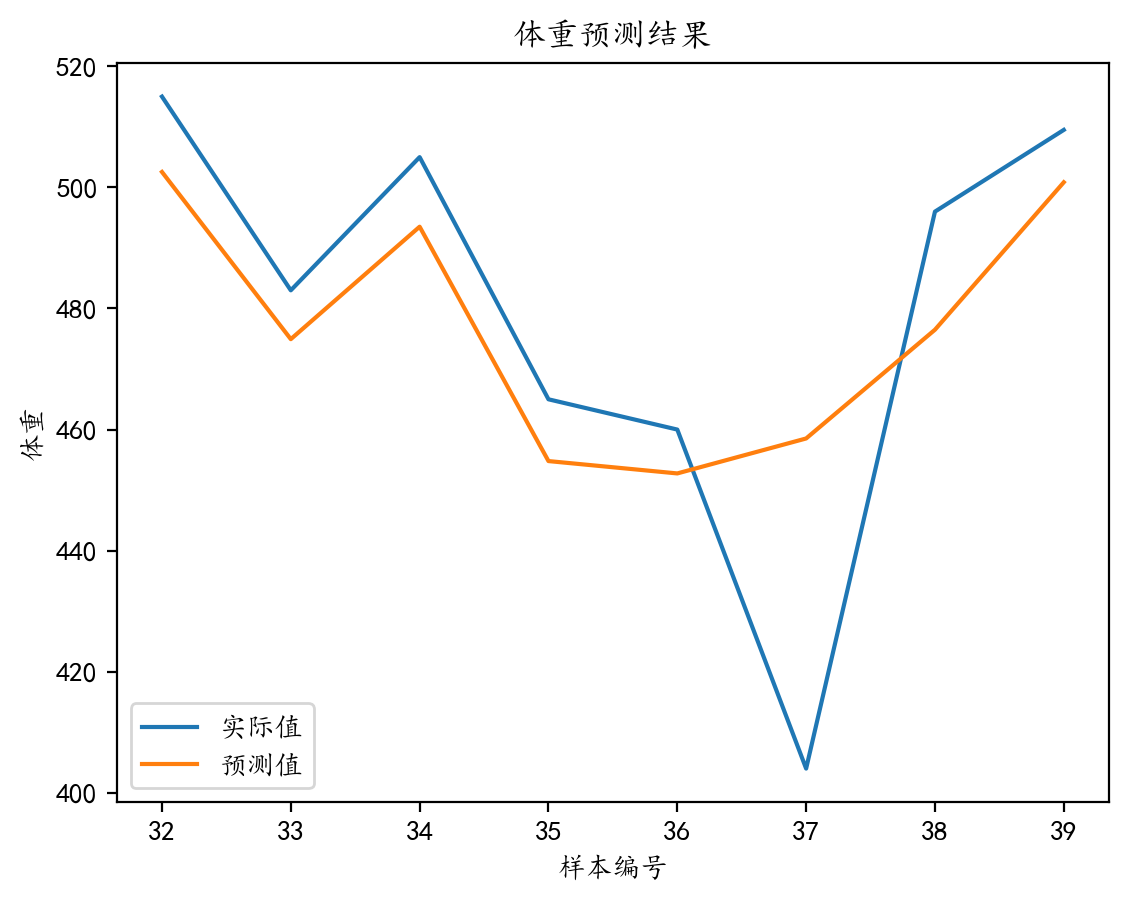

In [19]:
# 提取预测值和实际值
y_actual = test_set['体重y']
y_predicted = test_set['y_predicted']

# 创建图形对象
plt.figure()

# 绘制实际值和预测值曲线
plt.plot(y_actual, label='实际值')
plt.plot(y_predicted, label='预测值')

# 添加标题和标签
plt.title('体重预测结果')
plt.xlabel('样本编号')
plt.ylabel('体重')

# 添加图例
plt.legend()

# 显示图像
plt.show()


### 检验回归模型$y_4$对于测试集的拟合程度

0.7578958623425459


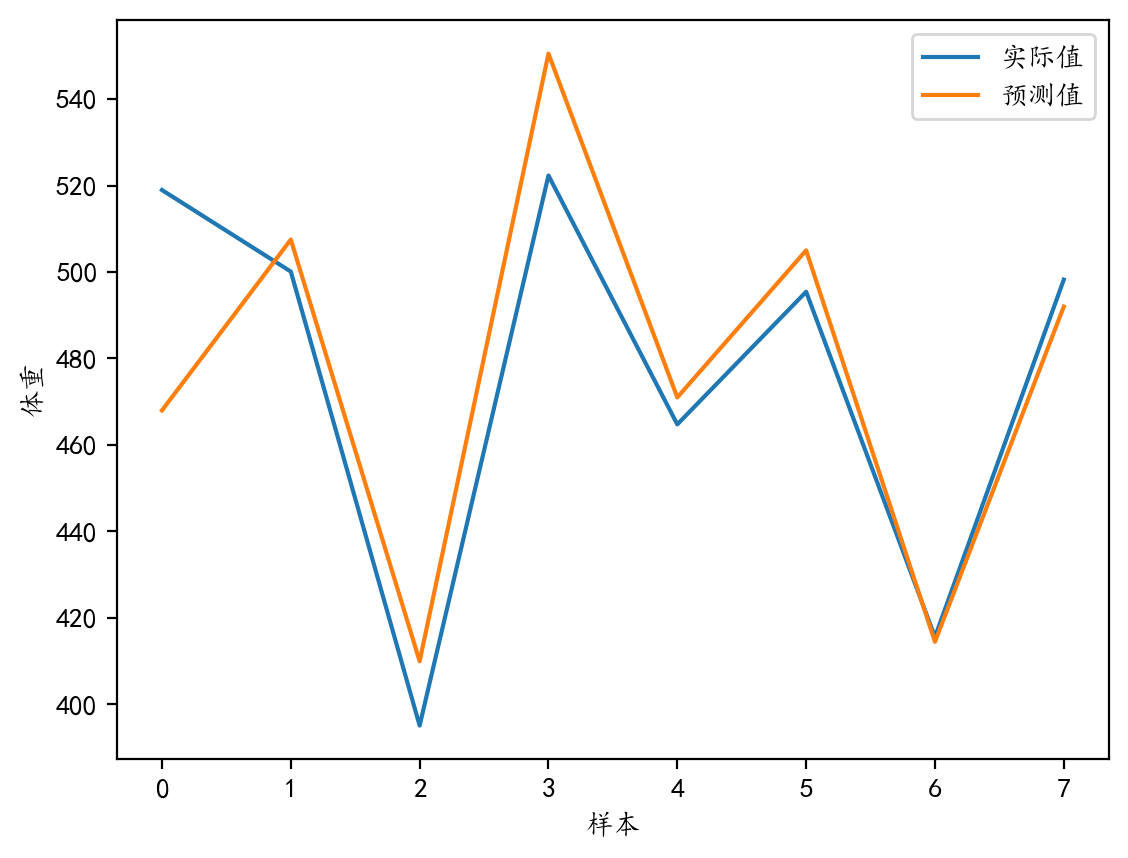

In [20]:
# 对线性回归进行预测
score = y4_model.score(X_test,Y_test)
print(score)
Y_pred = y4_model.predict(X_test)


# 绘制实际值和预测值曲线
plt.plot(range(len(Y_pred)), Y_pred, label="实际值")
plt.plot(range(len(Y_pred)), Y_test, label="预测值")

# 添加图例
plt.legend()

plt.xlabel("样本")
plt.ylabel('体重')

plt.show()


## 总结

在本次作业中建立了三个线性回归模型，分别是：

- 直接采用原始数据训练所得的模型： ​$$​y_1 = -728.9892 + 3.5252 x_1 + 1.9945 x_2 + 1.8215 x_3$$

- 排除明显偏离度较大的异常数据后建立的模型： ​$$​y_2 = -506.5932 + 3.0377 x_1 + 1.9677 x_2 + 0.8085 x_3$$

- 以前32组数据为训练集以及排除异常值后建立的模型：$$​y_3 = -570.9762 + 2.9672 x_1 + 1.8729 x_2 + 1.5596 x_3$$

- 随机选取32组数据为训练集建立的模型：$$​y_4 = -749.82 + 3.72 x_1 + 1.8577 x_2 + 1.8402 x_3$$

其中，对于模型 ​$y_3 = -570.9762 + 2.9672 x_1 + 1.8729 x_2 + 1.5596 x_3$ 使用测试集`test_set`检验模型对于测试集的拟合度显示对于测试集的拟合效果并不优良，`均方误差（MSE）： 492.1848164899998、决定系数（R-squared）： 0.5804707642417968`。观察其预测值与真实值的曲线，发现两条曲线的走势大体一致，只是在样本编号处实际值突变远低于预测值，但也可以发现预测值相较于真实值总体偏低，模型需要进一步改进。

对于模型 $y_1$ 与 $y_2$ 而言，因为其训练数据集包含了测试集，所以在用测试集训练的时候其性能指标较 $y_3$ 更为优秀，但这并不意味着 $y_1$ 与 $y_2$ 相较于 $y_3$ 在面对其他测试集的情况下有更好的泛化能力。

对于模型 $y_4$ 而言其性能大体应该与模型 $y_3$ 差不多，本质上其与模型 $y_3$ 是一样的，只不过由于随机抽取训练集的方式其可能没有包含异常值，加之其模型参数比较随机，便不过多赘述其性能。